# Monte Carlo integration

Imagine that we want to measure the area of a pond with arbitrary shape. Suppose that this pond is in the middle of a field with known area $A$. If we throw $N$ stones randomly, such that they land within the boundaries of the field, and we count the number of stones that fall in the pond $N_{in}$, the area of the pond will be approximately proportional to the fraction of stones that make a splash, multiplied by $A$: $$A_{pond}=\frac{N_{in}}{N}A.$$ This simple procedure is an example of the “Monte Carlo” method.
Simple Monte Carlo integration

More generaly, imagine a rectangle of height $H$ in the integration interval $[a,b]$, such that the function $f(x)$ is within its boundaries. Compute $n$ pairs of random numbers $(x_i,y_i)$ such that they are uniformly distributed inside this rectangle. The fraction of points that fall within the area contained below $f(x)$, *i. e.*, that satisfy $y_i \leq f(x_i)$ is an estimate of the ratio o fthe integral of $f(x)$ and the area of the rectangle. Hence, the estimate of the integral will be given by: $$\int _a^b{f(x)dx} \simeq I(N) = \frac{N_{in}}{N}H(b-a). $$


## Example: One dimensional integration

- Write a program that implements the “hit and miss” Monte Carlo integration algorithm. Find the estimate $I(N)$ for the integral of $$f(x)=4\sqrt{1-x^2}$$ as a function of $N$, in the interval $(0,1)$. Choose $H=1$, and sample only the $x$-dependent part $\sqrt{1-x^2}$, and multiply the result by 4. Calculate the difference between $I(N)$ and the exact result $\pi$. This difference is a measure of the error associated with the Monte Carlo estimate. Make a log-log plot of the error as a function of $N$. What is the approximate functional deppendece of the error on $N$ for large $N$?

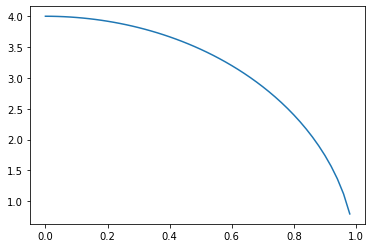

In [3]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot

x = np.arange(0,1,0.02)
pyplot.plot(x, 4*np.sqrt(1-x**2))

100 78 3.12 0.02159265358979301
200 154 3.08 0.061592653589793045
400 305 3.05 0.0915926535897933
800 614 3.07 0.07159265358979328
1600 1239 3.0975 0.044092653589792974
3200 2523 3.15375 0.012157346410206937
6400 4984 3.115 0.026592653589792903
12800 10032 3.135 0.006592653589793329
25600 19977 3.12140625 0.020186403589792956
51200 40178 3.13890625 0.002686403589793329
102400 80374 3.139609375 0.0019832785897930805
204800 160974 3.1440234375 0.0024307839102069018
409600 321208 3.136796875 0.004795778589793187
819200 643771 3.1434130859375 0.0018204323477069018
1638400 1286639 3.14120849609375 0.0003841574960432581


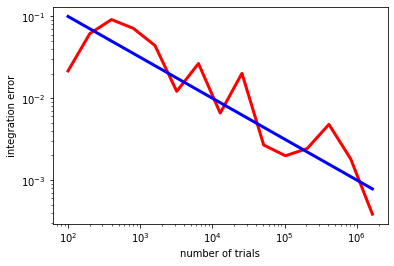

In [10]:
# Hit and miss Monte Carlo integration
ngroups = 15

#set up arrays to save results
#number of draws
N = np.zeros(ngroups)
#estimate for the integral
I = np.zeros(ngroups)
#error of this particular estimate
E = np.zeros(ngroups)

#start with 100 draws
n0 = 100
for i in range(ngroups):
    #save n0 in N
    N[i] = n0
    # generate n0 random points
    x = np.random.random(n0)
    y = np.random.random(n0)
    I[i] = 0.
    Nin = 0
    #now check how many these points are below the curve
    for j in range(n0):
        if(y[j] < np.sqrt(1-x[j]**2)):
            Nin += 1
    #now estimate integral based on fraction of points accepted and size of the rectangle
    I[i] = 4.*float(Nin)/float(n0)
    E[i] = abs(I[i]-np.pi)
    print (n0,Nin,I[i],E[i])
    n0 *= 2
    
#plot results            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,1.0/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xlabel('number of trials')
pyplot.ylabel('integration error')
pyplot.xscale('log')
pyplot.yscale('log')

## Exercise
- 2D Monte Carlo: Compute estimates of $\pi$ by evaluating the area of the unit disk $x^2+y^2<=1$ using Monte Carlo Integration with varying $N$, and make a log-log plot of the error as a function of $N$.
- 3D Monte Carlo: Now estimate the volume of the unit ball defined by $x^2+y^2+z^2<=1$, and make a log-log plot of the error as a function of $N$.
- How does the error of Monte Carlo Integration scale with dimension?

## Some python suggestions
- plotting
- argument passing

### Plotting
Based on discussions in breakout rooms on Wednesday, here are some suggestions for plotting

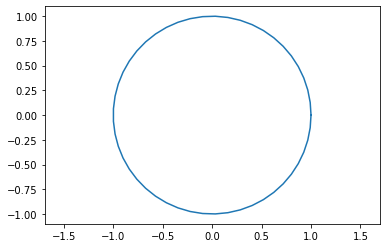

In [7]:
#draw unit circle - Option 1
#pyplot.plot does not do parametric plots
#Option 1: use parameteric form, and explicitly give x(t),y(t) coordinates
t = np.linspace(0, 2*np.pi, num=50, endpoint=True)
pyplot.axis('equal')
pyplot.plot(np.cos(t),np.sin(t))


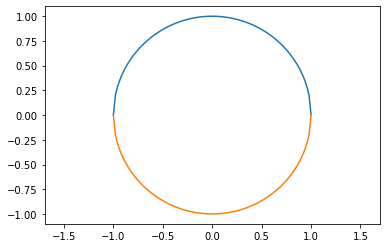

In [13]:
#option 2: generate array of x values, calculate corresponding y values
x = np.linspace(-1,1,num=100, endpoint = True)
y = np.sqrt(1-x**2)
pyplot.axis('equal')
pyplot.plot(x,y)
#note that we need both roots
pyplot.plot(x,-y)

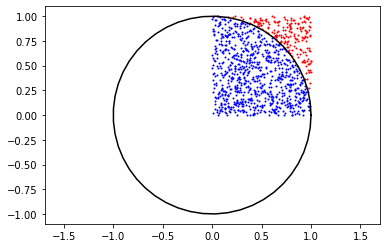

In [28]:
#Example for plotting trials, color-coded in/out condition
n0 = 1000
x = np.random.random(n0)
y = np.random.random(n0)
#compute distance from origin
r = np.sqrt(x**2+y**2)
#index of points inside the circle
ind_in = np.where(r<=1)
#index of points out the circle
ind_out = np.where(r>1)
#now plot this
pyplot.axis('equal')
pyplot.plot(np.cos(t),np.sin(t),color='k')
pyplot.scatter(x[ind_in],y[ind_in],color='b',s=1.0)
pyplot.scatter(x[ind_out],y[ind_out],color='r',s=1.0)

Note that this only generated trials in one quadrant!

What do you need to change to draw (pseudo-)random samples over the entire [-1,1]x[-1,1] trial area?  
_Hint: mirrored copies are not (pseudo-)independent!_

Write a function
`draw_1D(N,x_min,x_max)` that returns an array of `N` samples in the interval `[x_min,x_max]`

In [30]:
def draw_1D(N,x_min,x_max):
    return x_min+np.random.random(n0)*(x_max-x_min)
    

### Argument passing  

Let's re-write the code for hit-or-miss Monte Carlo integration from above as a function that can be reused: 
- use `draw_1D` to generate samples in one variable
- use `draw_2D` to packaged together two calls to `draw_1D` to generate `[x,y]` samples
- rewrite the condition `if(y[j] < np.sqrt(1-x[j]**2))` to call a function `integrand_1D(x)` instead of evaluating `np.sqrt(1-x[j]**2)`

In [48]:
def integrand_1D(x):
    return np.sqrt(1-x**2)
def draw_2D(n0,x_min,x_max,y_min,y_max):
    x = draw_1D(n0,x_min,x_max)
    y = draw_1D(n0,y_min,y_max)
    return [x,y]
def MC_1D(func, n0,x_min,x_max,y_min,y_max):
    # generate n0 random 2D points
    [x,y] = draw_2D(n0,x_min,x_max,y_min,y_max)
    Nin = 0
    #now check how many these points are below the curve
    for j in range(n0):
        if(y[j] < func(x[j])):
            Nin += 1
    #now estimate integral based on fraction of points accepted and size of the rectangle
    I = 4.*float(Nin)/float(n0)
    return I

    

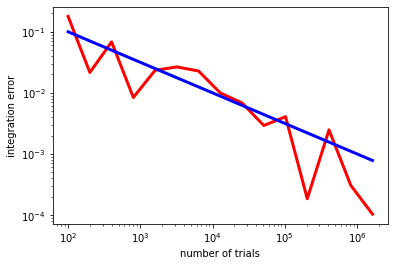

In [44]:
#now redo the 1D integration example from above:
ngroups = 15

#set up arrays to save results
#number of draws
N = np.zeros(ngroups)
#estimate for the integral
I = np.zeros(ngroups)
#error of this particular estimate
E = np.zeros(ngroups)

n0 =100
for i in range(ngroups):
    N[i] = n0
    I[i] = MC_1D(integrand_1D,n0,0,1,0,1)
    E[i] = abs(I[i]-np.pi)
    n0*=2
#plot results            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,1.0/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xlabel('number of trials')
pyplot.ylabel('integration error')
pyplot.xscale('log')
pyplot.yscale('log')
    

Now, that's a lot of arguments to be passed.  
A more elegant way of dealing with this is to use Python’s argument-packing syntax. If `P` is a tuple, then `*P` in an argument list when calling a function unpacks the contents of the tuple into individual arguments. 

In [45]:
def MC_1D_v2(func, n0,*P):
    # generate n0 random points
    [x,y] = draw_2D(n0,P)
    Nin = 0
    #now check how many these points are below the curve
    for j in range(n0):
        if(y[j] < func(x[j])):
            Nin += 1
    #now estimate integral based on fraction of points accepted and size of the rectangle
    I = 4.*float(Nin)/float(n0)
    return I

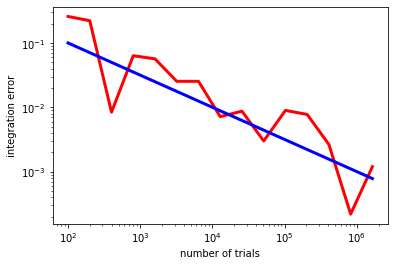

In [47]:
#now redo the 1D integration example from above:
ngroups = 15

#set up arrays to save results
#number of draws
N = np.zeros(ngroups)
#estimate for the integral
I = np.zeros(ngroups)
#error of this particular estimate
E = np.zeros(ngroups)

n0 =100
P = (0,1,0,1)
for i in range(ngroups):
    N[i] = n0
    I[i] = MC_1D(integrand_1D,n0,*P)
    E[i] = abs(I[i]-np.pi)
    n0*=2
#plot results            
pyplot.plot(N,E,ls='-',c='red',lw=3);
pyplot.plot(N,1.0/np.sqrt(N),ls='-',c='blue',lw=3);
pyplot.xlabel('number of trials')
pyplot.ylabel('integration error')
pyplot.xscale('log')
pyplot.yscale('log')
    

With these tools, let's do a more compact version of the disk and ball integration!  
If you're a numpy array expert, you could write an n-dimensional version, otherwise doing 2D and 3D separately might be more efficient in terms of your time.
_Before you start coding, discuss how to change the condition for counting a trial, and what parameters to pack into your parameter tuple `P`_

In [ ]:
def radius_2D(x,y):
    return np.sqrt(x**2+y**2)
def MC_2D(func, n0,*P):